In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx


In [162]:
marvel = pd.read_csv("edges.csv")
marvel

,source,target
0,Baron Zemo,Blackout (Marcus Daniels)
1,Baron Zemo,Vermin (comics)
2,N'astirh,S'ym
3,N'astirh,Belasco (Marvel Comics)
4,N'astirh,Madelyne Pryor
...,...,...
341,Captain America,Rikki Barnes
342,Red Skull,Viper (Madame Hydra)
343,Red Skull,Arnim Zola
344,Apocalypse (Marvel Comics),Mister Sinister


In [186]:
# Create network

marvel_network = nx.from_pandas_edgelist(marvel, 'source', 'target') 


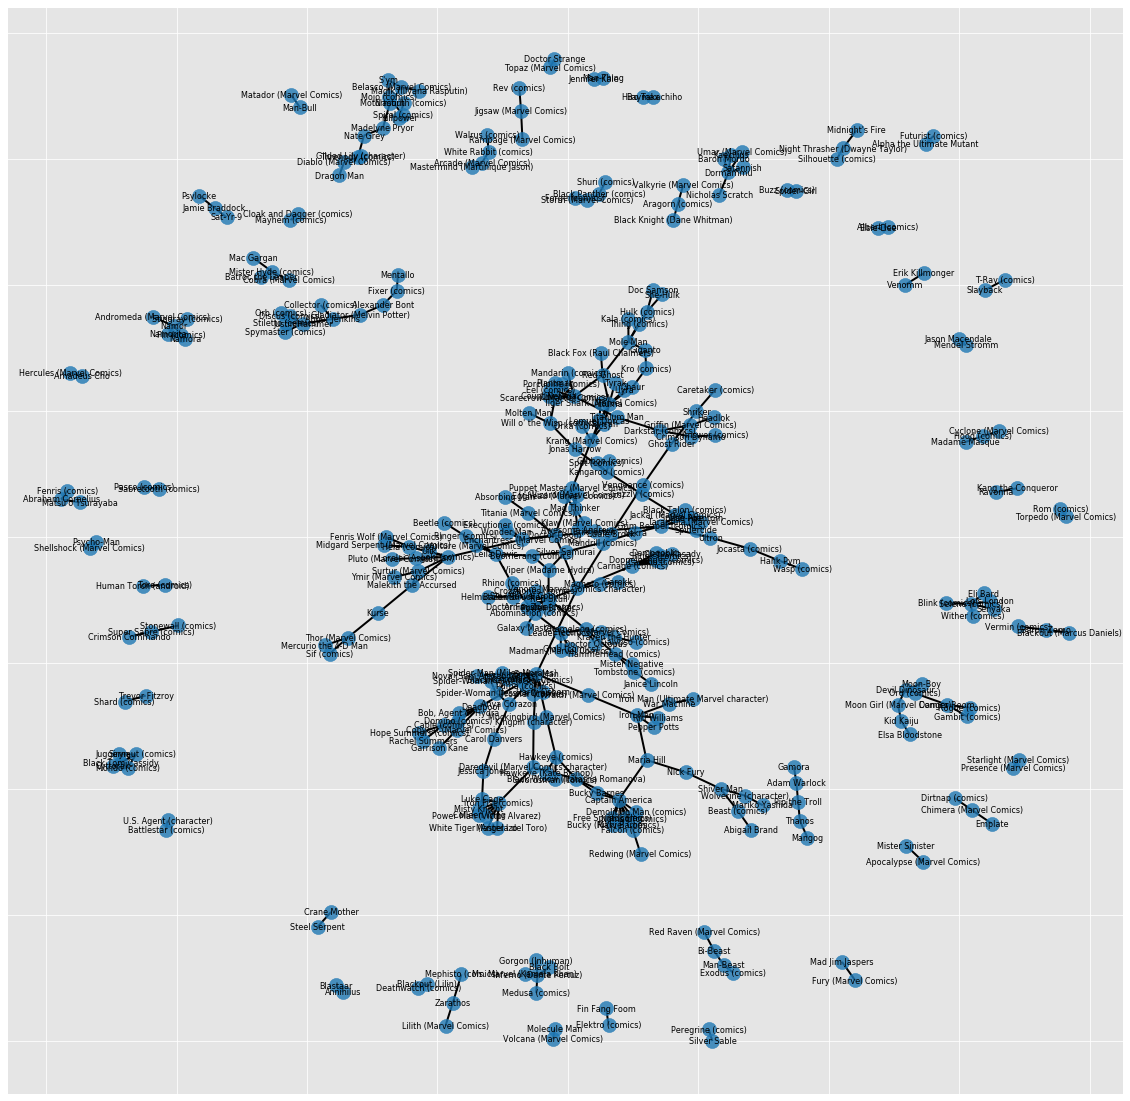

In [188]:
# Visualize the network
pos= nx.spring_layout(marvel_network)
f, ax = plt.subplots(figsize=(20, 20))

nx.draw_networkx_nodes(marvel_network, pos,alpha=0.8,node_size=200)
nx.draw_networkx_labels(marvel_network, pos, font_size=8)
nx.draw_networkx_edges(marvel_network, pos, width=2.0, alpha=1)

In [190]:
# Check the info of marvel_network
print (nx.info(marvel_network))

# Why there are 350 nodes

Name: 
Type: Graph
Number of nodes: 350
Number of edges: 346
Average degree:   1.9771


In [201]:
# Calculate different centrality measures for the network (degree centrality, betweenness, closeness, PageRank)
degree = nx.degree_centrality(marvel_network)
closeness = nx.closeness_centrality(marvel_network)
betweenness = nx.betweenness_centrality(marvel_network)
pagerank = nx.pagerank(marvel_network)

centrality_marvel = pd.DataFrame(index = marvel_network.nodes())
centrality_marvel['Degree_Centrality'] = degree.values()
centrality_marvel['Closeness_Centrality'] = closeness.values()
centrality_marvel['Betweenness_Centrality'] = betweenness.values()
centrality_marvel['Pagerank'] = pagerank.values()

centrality_marvel

,Degree_Centrality,Closeness_Centrality,Betweenness_Centrality,Pagerank
Baron Zemo,0.005731,0.005731,0.000016,0.004172
Blackout (Marcus Daniels),0.002865,0.003820,0.000000,0.002200
Vermin (comics),0.002865,0.003820,0.000000,0.002200
N'astirh,0.008596,0.010315,0.000148,0.003929
S'ym,0.005731,0.007935,0.000000,0.002678
...,...,...,...,...
Jack Flag,0.002865,0.057663,0.000000,0.001328
Rikki Barnes,0.002865,0.057663,0.000000,0.001328
Arnim Zola,0.002865,0.081651,0.000000,0.001352
Apocalypse (Marvel Comics),0.002865,0.002865,0.000000,0.002857


In [231]:
# Compare the results
# First by creating a table that contains the 10 most central characters 
# based on every method and examining the rankings 

df_top10=pd.DataFrame(index=range(1,11))

for col in centrality_marvel.columns:
    result = list(centrality_marvel.sort_values(by = col, ascending = False).index[:10])
    df_top10[col]=result
df_top10

,Degree_Centrality,Closeness_Centrality,Betweenness_Centrality,Pagerank
1,Spider-Man,Venom (Marvel Comics character),Venom (Marvel Comics character),Spider-Man
2,Captain America,Doctor Doom,Doctor Doom,Captain America
3,Red Skull,Spider-Man,Spider-Man,Red Skull
4,Attuma,Puppet Master (Marvel Comics),Puppet Master (Marvel Comics),Selene (comics)
5,Unicorn (comics),Red Skull,Krang (Marvel Comics),Unicorn (comics)
6,Iron Fist (comics),Enchantress (Marvel Comics),Attuma,Grim Reaper (comics)
7,Scarecrow (Marvel Comics),Carnage (comics),Red Ghost,Chameleon (comics)
8,Loki (comics),Eddie Brock,Red Skull,Attuma
9,Chameleon (comics),Magneto (comics),Enchantress (Marvel Comics),Loki (comics)
10,Grim Reaper (comics),Wraith (Marvel Comics),Unicorn (comics),Dormammu


In [232]:
# Secondly by calculating the correlations between the measures.
centrality_marvel.corr()
# In terms of correlation: Degree_Centrality and Pagerank


,Degree_Centrality,Closeness_Centrality,Betweenness_Centrality,Pagerank
Degree_Centrality,1.000000,0.449451,0.609927,0.865970
Closeness_Centrality,0.449451,1.000000,0.403945,0.095023
Betweenness_Centrality,0.609927,0.403945,1.000000,0.507641
Pagerank,0.865970,0.095023,0.507641,1.000000


In [435]:
# Which methods are the most similar to each other in terms of the most central characters 
# and in terms of correlation?

# In terms of the most central characters: 
# (calculate the number of common characters in the list of top 10 characters for each pair of methods)
method_list = list(df_top10.columns)
method_pair=[]
common_characters=[]
keep = []
for i in method_list:
    sublist= [x for x in method_list if x != i]
    for j in sublist:
        l= [c for c in df_top10[i].values if c in df_top10[j].values]
#         print ("The common characters of ", i , "and", j, "is: ")
#         print (l)
#         print ("*"*60)
        
        temp = [i,j]
        
        
        if len(common_characters)<len(l):
            method_pair= temp
            common_characters=l
            
        elif len(common_characters)>len(l):
            method_pair=method_pair
            common_characters=common_characters
            
        elif len(common_characters)==len(l):
            a=method_pair.copy()
            a.append(temp)
            method_pair=[a[:-1]]
            method_pair.append(temp)
            keep.append(l)

print ("In terms of the most central characters: ", method_pair)

# In terms of correlation: Degree_Centrality and Pagerank

# The same result 

In terms of the most central characters:  [['Degree_Centrality', 'Pagerank'], ['Pagerank', 'Degree_Centrality']]
